# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\Kevin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [12]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_flow,test_flow, label):
    plt.plot(train_history.history[train_flow])
    plt.plot(train_history.history[test_flow])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 44s 1ms/step - loss: 0.3099 - acc: 0.9001 - val_loss: 0.2972 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 41s 1ms/step - loss: 0.2851 - acc: 0.9009 - val_loss: 0.2831 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 41s 1ms/step - loss: 0.2702 - acc: 0.9025 - val_loss: 0.2707 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 41s 1ms/step - loss: 0.2565 - acc: 0.9049 - val_loss: 0.2588 - val_acc: 0.9014
Epoch 5/10
40000/40000 [==============================] - 41s 1ms/step - loss: 0.2463 - acc: 0.9070 - val_loss: 0.2498 - val_acc: 0.9028
Epoch 6/10
40000/40000 [==============================] - 46s 1ms/step - loss: 0.2385 - acc: 0.9090 - val_loss: 0.2437 - val_acc: 0.9043
Epoch 7/10
40000/40000 [==============================] - 43s 1ms/step - loss: 0.2312 - acc: 0.9110 - val_loss: 0.2379 - val_acc

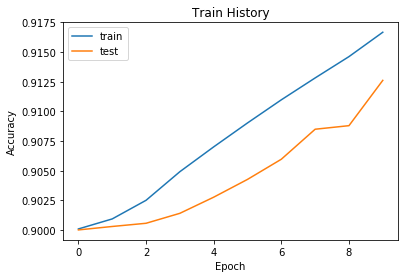

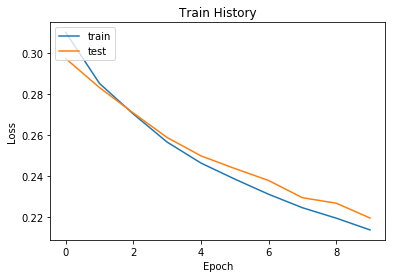

10000/10000 [==============================] - 2s 153us/step
Test accuracy: 0.9134099729537963
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 39s 980us/step - loss: 1.3849 - acc: 0.5061 - val_loss: 1.3699 - val_acc: 0.5575
Epoch 2/10
40000/40000 [==============================] - 39s 968us/step - loss: 1.2430 - acc: 0.5572 - val_loss: 1.2614 - val_acc: 0.5922
Epoch 3/10
40000/40000 [==============================] - 38s 962us/step - loss: 1.1460 - acc: 0.5940 - val_loss: 1.2168 - val_acc: 0.5839
Epoch 4/10
40000/40000 [==============================] - 38s 952us/step - loss: 1.0701 - acc: 0.6246 - val_loss: 1.1340 - val_acc: 0.6398
Epoch 5/10
40000/40000 [==============================] - 39s 968us/step - loss: 1.0101 - acc: 0.6442 - val_loss: 1.0848 - val_acc: 0.6488
Epoch 6/10
40000/40000 [==============================] - 38s 957us/step - loss: 0.9445 - acc: 0.6667 - val_loss: 1.0268 - val_acc: 0.6651
Epoch 7/10
40000/4000

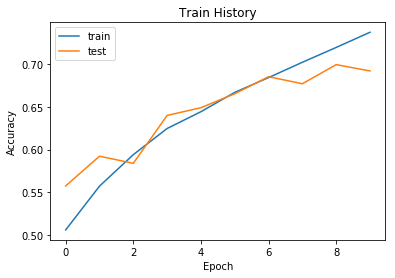

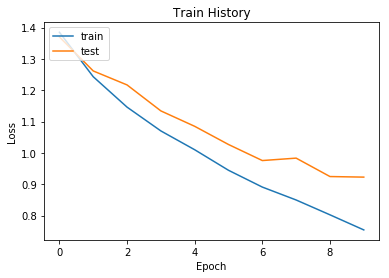

10000/10000 [==============================] - 1s 140us/step
Test accuracy: 0.6871
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 38s 947us/step - loss: 0.0319 - acc: 0.7722 - val_loss: 0.0402 - val_acc: 0.7197
Epoch 2/10
40000/40000 [==============================] - 37s 937us/step - loss: 0.0311 - acc: 0.7778 - val_loss: 0.0401 - val_acc: 0.7211
Epoch 3/10
27024/40000 [===================>..........] - ETA: 11s - loss: 0.0308 - acc: 0.7820

KeyboardInterrupt: 

In [14]:
loss_list = ["binary_crossentropy", "categorical_crossentropy", "MSE"]

for loss_function in loss_list:
    model.compile(loss=loss_function, optimizer='sgd', metrics=['accuracy'])
    
    train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=16, verbose=1)
    
    show_train_history('acc','val_acc', 'Accuracy')
    show_train_history('loss','val_loss', 'Loss')
    
    # Score trained model.
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=1)
    print('Test accuracy:', scores[1])